<a href="https://colab.research.google.com/github/albreiki111-oss/AI-project/blob/main/Seventh_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

--2025-09-04 18:28:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘processed.cleveland.data’

processed.cleveland     [ <=>                ]  18.03K  --.-KB/s    in 0.03s   

2025-09-04 18:28:21 (684 KB/s) - ‘processed.cleveland.data’ saved [18461]



In [2]:
import pandas as pd
df = pd.read_csv('processed.cleveland.data', header=None)
print(df.head())

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [3]:
print(set(df[13]))
df[13].replace(to_replace=[2,3,4], value=1, inplace=True)
print(df.head())
print(set(df[13]))

{0, 1, 2, 3, 4}
     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   1
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
{0, 1}


/tmp/ipython-input-353381304.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[13].replace(to_replace=[2,3,4], value=1, inplace=True)


In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


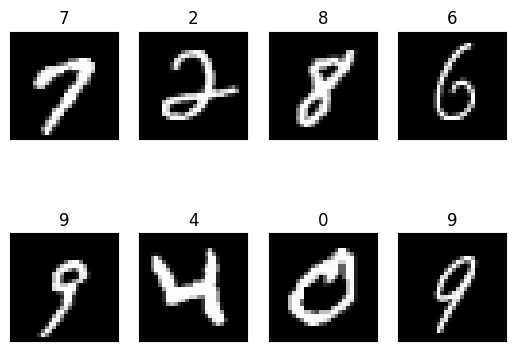

In [6]:
import matplotlib.pyplot as plt
for i, (img, y) in enumerate(zip(mnist.data[15:23].values.reshape(8, 28, 28), mnist.target[15:23])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.3.mnist_samples.png', bbox_inches='tight', dpi=350)

In [8]:
print(mnist.data.iloc[0].values.reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
print(mnist.data.iloc[0].values.reshape(28, 28)[10:18,10:18])

# Access the underlying NumPy array
mnist_data_np = mnist.data.values

# Apply thresholding to the NumPy array
mnist_data_np[mnist_data_np < 128] = 0
mnist_data_np[mnist_data_np >= 128] = 1

# Assign the modified NumPy array back to mnist.data (optional, depending on further usage)
mnist.data = pd.DataFrame(mnist_data_np, columns=mnist.data.columns)

print(mnist.data.iloc[0].values.reshape(28, 28)[10:18,10:18])

[[  1 154 253  90   0   0   0   0]
 [  0 139 253 190   2   0   0   0]
 [  0  11 190 253  70   0   0   0]
 [  0   0  35 241 225 160 108   1]
 [  0   0   0  81 240 253 253 119]
 [  0   0   0   0  45 186 253 253]
 [  0   0   0   0   0  16  93 252]
 [  0   0   0   0   0   0   0 249]]
[[0 1 1 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]]


In [12]:
X = mnist.data[(mnist.target == '7') | (mnist.target == '8')]
y = mnist.target[(mnist.target == '7') | (mnist.target == '8')]
print(X.shape)
print(y.shape)

(14118, 784)
(14118,)


In [13]:
print(y[:10])
y = [0 if v=='7' else 1 for v in y]
print(y[:10])

15    7
17    8
29    7
31    8
38    7
41    8
42    7
46    8
52    7
55    8
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


In [14]:
# re-load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
print(set(mnist.target))
print(list(set(mnist.target)))
print(sorted(list(set(mnist.target))))

le.fit(sorted(list(set(mnist.target))))

{'5', '0', '7', '3', '4', '1', '6', '9', '2', '8'}
['5', '0', '7', '3', '4', '1', '6', '9', '2', '8']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


LabelEncoder()

In [16]:
print(list(le.classes_))

print(le.transform(["9", "3", "7"]) )

list(le.inverse_transform([2, 2, 1]))

[np.str_('0'), np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5'), np.str_('6'), np.str_('7'), np.str_('8'), np.str_('9')]
[9 3 7]


[np.str_('2'), np.str_('2'), np.str_('1')]

In [17]:
print("Before ", mnist.target[:3])
y = le.transform(mnist.target)
print("After ", y[:3])

Before  0    5
1    0
2    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
After  [5 0 4]


In [18]:
import pandas as pd
df = pd.DataFrame({'Gender': ['female', 'male', 'male', 'female', 'female']})
print(df)

   Gender
0  female
1    male
2    male
3  female
4  female


In [19]:
pd.get_dummies(df, prefix=['Gender'])

,Gender_female,Gender_male
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False


In [21]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = [list(v) for v in mnist.target]
enc.fit(y)

print('Before: ', y[0])
y = enc.transform(y).toarray()
print('After: ', y[0])
print(enc.get_feature_names_out())

Before:  ['5']
After:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
['x0_0' 'x0_1' 'x0_2' 'x0_3' 'x0_4' 'x0_5' 'x0_6' 'x0_7' 'x0_8' 'x0_9']


In [22]:
df = pd.read_csv('processed.cleveland.data', header=None)
df[[4,9]].describe()

,4,9
count,303.000000,303.000000
mean,246.693069,1.039604
std,51.776918,1.161075
min,126.000000,0.000000
25%,211.000000,0.000000
50%,241.000000,0.800000
75%,275.000000,1.600000
max,564.000000,6.200000


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[[4,9]])
df[[4,9]] = scaler.transform(df[[4,9]])
df[[4,9]].describe()

,4,9
count,303.000000,303.000000
mean,0.275555,0.167678
std,0.118212,0.187270
min,0.000000,0.000000
25%,0.194064,0.000000
50%,0.262557,0.129032
75%,0.340183,0.258065
max,1.000000,1.000000


In [24]:
df[[4,9]] = (df[[4,9]]-df[[4,9]].mean())/df[[4,9]].std()
df[[4,9]].describe()

,4,9
count,3.030000e+02,3.030000e+02
mean,-6.448820e-16,-1.641518e-16
std,1.000000e+00,1.000000e+00
min,-2.331021e+00,-8.953805e-01
25%,-6.893626e-01,-8.953805e-01
50%,-1.099538e-01,-2.063639e-01
75%,5.467095e-01,4.826527e-01
max,6.128347e+00,4.444498e+00


In [25]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('processed.cleveland.data', header=None)
scaler = StandardScaler()
scaler.fit(df[[4,9]])
df[[4,9]] = scaler.transform(df[[4,9]])
df[[4,9]].describe()

,4,9
count,3.030000e+02,3.030000e+02
mean,2.345026e-16,2.345026e-17
std,1.001654e+00,1.001654e+00
min,-2.334877e+00,-8.968617e-01
25%,-6.905030e-01,-8.968617e-01
50%,-1.101357e-01,-2.067053e-01
75%,5.476139e-01,4.834512e-01
max,6.138485e+00,4.451851e+00


In [26]:
from sklearn.preprocessing import QuantileTransformer
df = pd.read_csv('processed.cleveland.data', header=None)
transformer = QuantileTransformer(output_distribution='normal')
df[[4,9]] = transformer.fit_transform(df[[4,9]])
df[[4,9]].describe()

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (303). n_quantiles is set to n_samples.
  warnings.warn(


,4,9
count,303.000000,303.000000
mean,0.000036,-1.327762
std,1.069129,2.770411
min,-5.199338,-5.199338
25%,-0.684947,-5.199338
50%,0.000000,0.045666
75%,0.674490,0.638453
max,5.199338,5.199338


In [27]:
from sklearn.preprocessing import QuantileTransformer
df = pd.read_csv('processed.cleveland.data', header=None)
transformer = QuantileTransformer(output_distribution='uniform')
df[[4,9]] = transformer.fit_transform(df[[4,9]])
df[[4,9]].describe()

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (303). n_quantiles is set to n_samples.
  warnings.warn(


,4,9
count,303.000000,303.000000
mean,0.500005,0.447069
std,0.290072,0.350610
min,0.000000,0.000000
25%,0.246689,0.000000
50%,0.500000,0.518212
75%,0.750000,0.738411
max,1.000000,1.000000


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (297). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (297). n_quantiles is set to n_samples.
  warnings.warn(


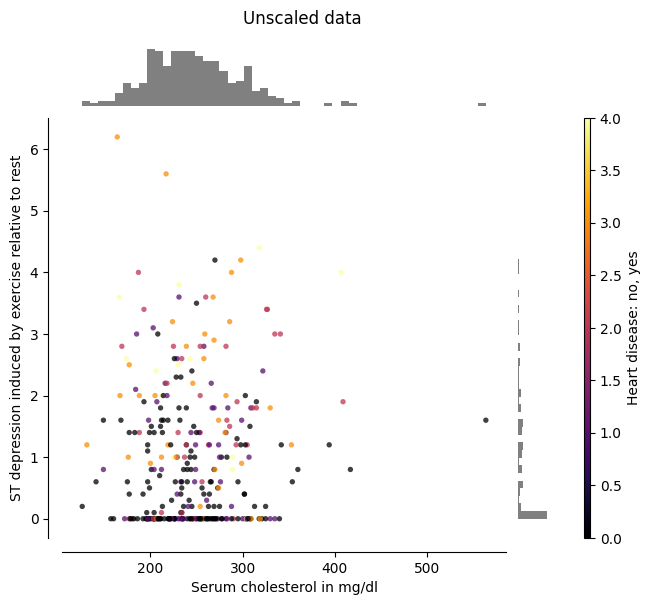

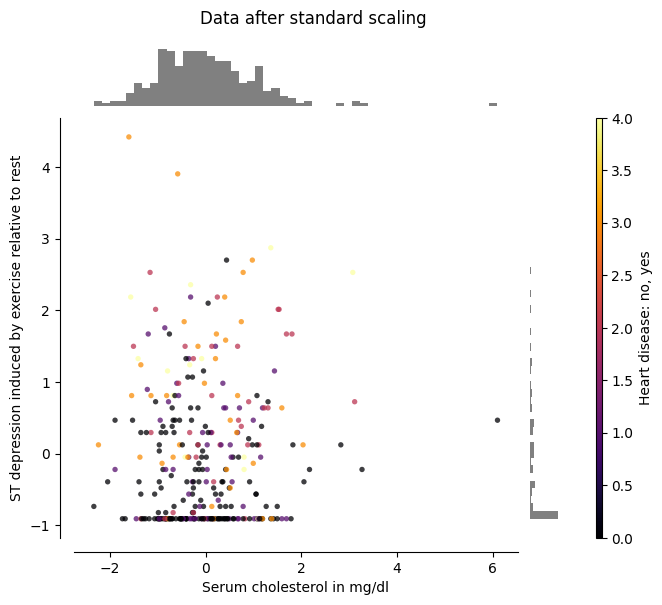

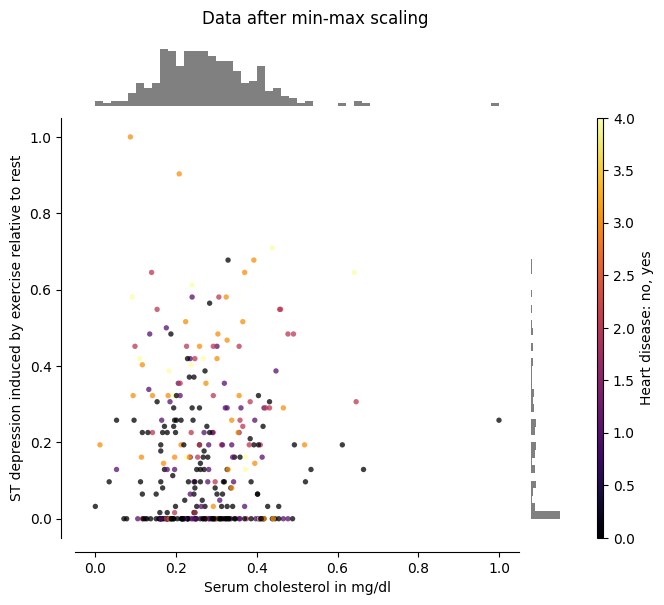

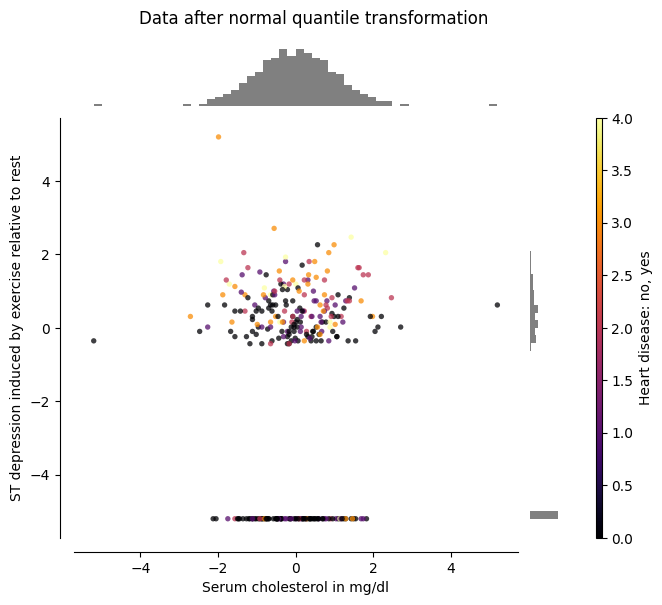

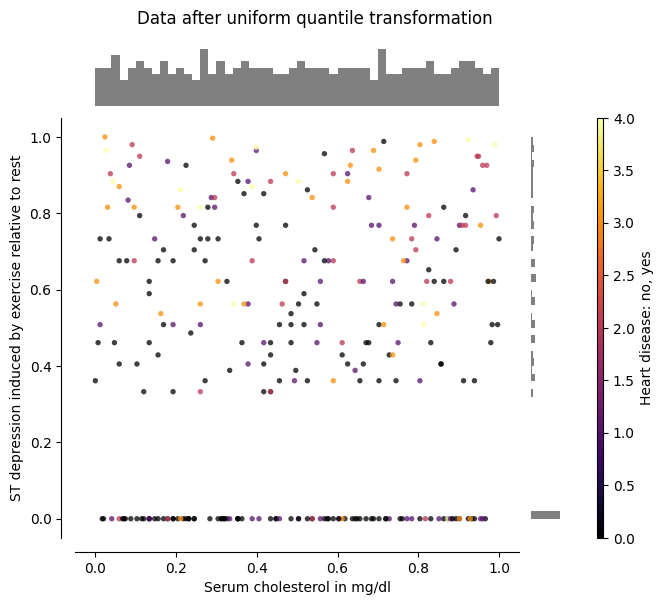

In [30]:
# Inspired by this post: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
# Modified by: Pablo Rivas

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

df = pd.read_csv('processed.cleveland.data', header=None)
X = df[[4,9]].values
y_full = df[13].values

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after normal quantile transformation',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after uniform quantile transformation',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X))
]

y = minmax_scale(y_full)

cmap = getattr(cm, 'inferno', cm.hot_r)

def create_axes(title, figsize=(6, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.74
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.12
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)


    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            ax_colorbar)

def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.75, marker='o', s=15, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_colorbar = create_axes(title)
    plot_distribution(ax_zoom_out, X, y, hist_nbins=50,
                      x0_label="Serum cholesterol in mg/dl",
                      x1_label="ST depression induced by exercise relative to rest")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Heart disease: no, yes')
    plt.savefig('ch.3.normalization.'+str(item_idx)+'.png', bbox_inches='tight', dpi=350)

make_plot(0)
make_plot(1)
make_plot(2)
make_plot(3)
make_plot(4)

In [31]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [35]:
from skimage.transform import rescale
import numpy as np

x = mnist.data.iloc[0].values.reshape(28,28)
y = mnist.target.iloc[0]

s = rescale(x, 1.0 / 2.0, channel_axis=None)
x_= rescale(s, 2.0, channel_axis=None)

# Convert the rescaled data back to the original dtype before assigning
mnist.data.iloc[1] = x_.flatten().astype(mnist.data.iloc[1].dtype)
mnist.target.iloc[1] = y

In [41]:
from skimage.util import random_noise
import numpy as np
import pandas as pd # Import pandas

# Get the entire data as a NumPy array
mnist_data_np = mnist.data.values
y = mnist.target

# Access the NumPy array for the image at index 0 to get its shape and dtype
x_np_template = mnist_data_np[0].reshape(28,28)

# Apply random noise to the NumPy array of the image at index 0
x_noisy_np = random_noise(x_np_template, clip=True)

# Scale back to 0-255 range and convert to the original dtype
x_noisy_flat = (x_noisy_np * 255).flatten().astype(mnist_data_np.dtype)

# Replace the row at index 2 in the full NumPy array with the noisy data
mnist_data_np[2] = x_noisy_flat

# Update the mnist.data DataFrame with the modified NumPy array
mnist.data = pd.DataFrame(mnist_data_np, columns=mnist.data.columns)

# Update the mnist.target Series with the target value for the modified row
mnist.target.iloc[2] = y.iloc[0] # Assigning the target of the original image to the new noisy image

In [44]:
from skimage.transform import rotate
import numpy as np # Import numpy for dtype

# x is defined in previous cells (x is the first image)
# Define y as the target of the first image
y = mnist.target.iloc[0]

x_ = rotate(x, 22)

# Flatten the rotated array and convert to the original dtype
x_rotated_flat = x_.flatten().astype(mnist.data.iloc[3].dtype)

# Assign the flattened rotated image data to the row at index 3
mnist.data.iloc[3] = x_rotated_flat
mnist.target.iloc[3] = y

In [46]:
from skimage.transform import rescale, rotate
from skimage.util import random_noise
import numpy as np

x = mnist.data.iloc[4].values.reshape(28,28)
y = mnist.target.iloc[4]

s = rescale(x, 1.0 / 2.0, channel_axis=None)
x_= rescale(s, 2.0, channel_axis=None)

mnist.data.iloc[5] = x_.flatten().astype(mnist.data.iloc[5].dtype)
mnist.target.iloc[5] = y

x_ = random_noise(x, clip=True)
mnist.data.iloc[6] = x_.flatten().astype(mnist.data.iloc[6].dtype)
mnist.target.iloc[6] = y

x_ = rotate(x, -22)
mnist.data.iloc[7] = x_.flatten().astype(mnist.data.iloc[7].dtype)
mnist.target.iloc[7] = y

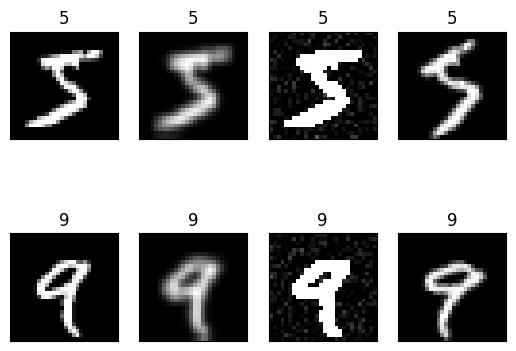

In [48]:
import matplotlib.pyplot as plt
for i, (img, y) in enumerate(zip(mnist.data[0:8].values.reshape(8, 28, 28), mnist.target[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.3.mnist_augmented.png', bbox_inches='tight', dpi=350)

(297, 2)


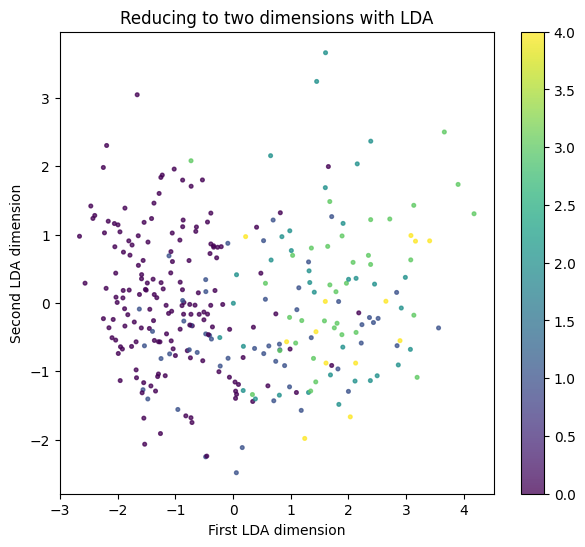

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df = pd.read_csv('processed.cleveland.data', header=None)
df = df.apply(pd.to_numeric, errors='coerce').dropna()

X = df[[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y = df[13].values

dr = LinearDiscriminantAnalysis(n_components=2)
X_ = dr.fit_transform(X, y)

print(X_.shape)

plt.figure(figsize=(7,6))
plt.title('Reducing to two dimensions with LDA')
plt.scatter(X_[:,0], X_[:,1], s=7, c=y, alpha=0.75)
plt.xlabel('First LDA dimension')
plt.ylabel('Second LDA dimension')
plt.colorbar()
plt.savefig('ch.3.LDA.png', bbox_inches='tight', dpi=350)

(297, 2)


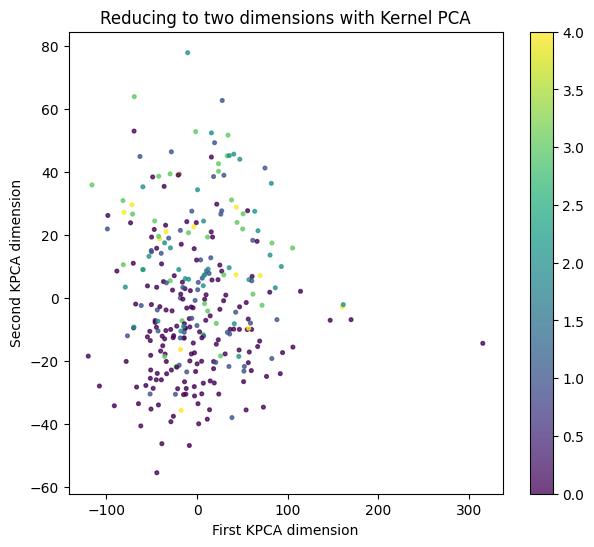

In [50]:
from sklearn.decomposition import KernelPCA

dr = KernelPCA(n_components=2, kernel='linear')
X_ = dr.fit_transform(X)

print(X_.shape)

plt.figure(figsize=(7,6))
plt.title('Reducing to two dimensions with Kernel PCA')
plt.scatter(X_[:,0], X_[:,1], s=7, c=y, alpha=0.75)
plt.xlabel('First KPCA dimension')
plt.ylabel('Second KPCA dimension')
plt.colorbar()
plt.savefig('ch.3.KPCA.png', bbox_inches='tight', dpi=350)

[dict_learning]
..................................................Minibatch step 1/16000: mean batch cost: 155365461.77130663
..................................................Minibatch step 2/16000: mean batch cost: 141641966.36287025
..................................................Minibatch step 3/16000: mean batch cost: 148863404.5940712
..................................................Minibatch step 4/16000: mean batch cost: 168023106.73125896
..................................................Minibatch step 5/16000: mean batch cost: 138573060.116547
..................................................Minibatch step 6/16000: mean batch cost: 152223722.55457366
..................................................Minibatch step 7/16000: mean batch cost: 129824629.66815075
..................................................Minibatch step 8/16000: mean batch cost: 142830281.80721033
..................................................Minibatch step 9/16000: mean batch cost: 111785414.200854

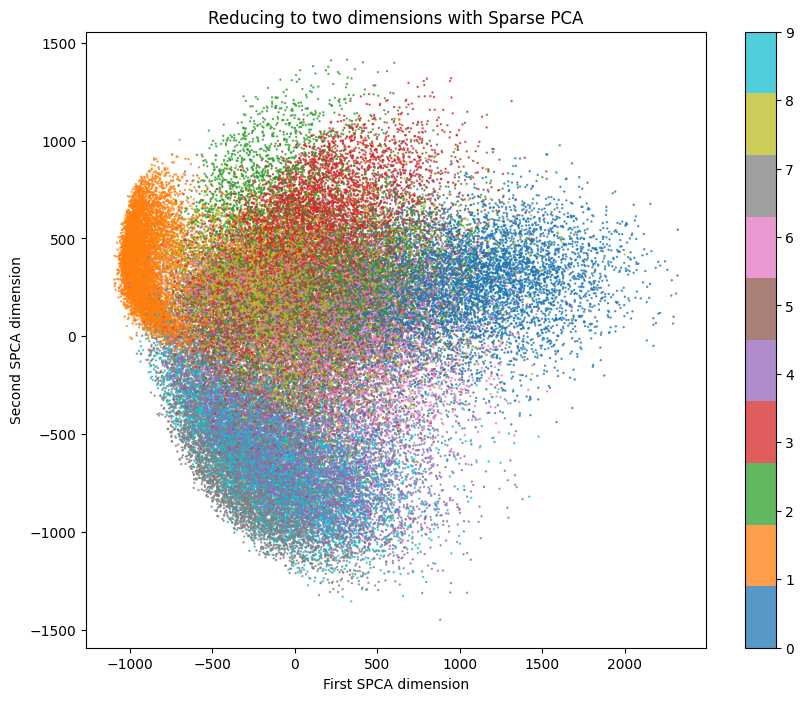

In [52]:
from sklearn.decomposition import MiniBatchSparsePCA
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
mnist = fetch_openml('mnist_784')

X = mnist.data
y = list(map(int, mnist.target))

dr = MiniBatchSparsePCA(n_components=2, batch_size=50, verbose=2)
X_ = dr.fit_transform(X)

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('Reducing to two dimensions with Sparse PCA')
plt.scatter(X_[:,0], X_[:,1], s=0.5, c=y, alpha=0.75, cmap='tab10')
plt.xlabel('First SPCA dimension')
plt.ylabel('Second SPCA dimension')
plt.colorbar()
plt.savefig('ch.3.SPCA.png', bbox_inches='tight', dpi=350)

[dict_learning]
Minibatch step 1/1400000: mean batch cost: 1516007.0435872038
Minibatch step 2/1400000: mean batch cost: 1579715.1995422286
Minibatch step 3/1400000: mean batch cost: 1607062.0037396345
Minibatch step 4/1400000: mean batch cost: 1511569.8038469746
Minibatch step 5/1400000: mean batch cost: 1502847.2729743584
Minibatch step 6/1400000: mean batch cost: 1572114.1414971114
Minibatch step 7/1400000: mean batch cost: 1485456.847301959
Minibatch step 8/1400000: mean batch cost: 1575487.22608626
Minibatch step 9/1400000: mean batch cost: 1533900.9305972925
Minibatch step 10/1400000: mean batch cost: 1459987.6847406423
Minibatch step 11/1400000: mean batch cost: 1524134.4897629514
Minibatch step 12/1400000: mean batch cost: 1420027.7480189942
Minibatch step 13/1400000: mean batch cost: 1494165.1133910695
Minibatch step 14/1400000: mean batch cost: 1579206.6872259052
Minibatch step 15/1400000: mean batch cost: 1485885.9123101966
Minibatch step 16/1400000: mean batch cost: 1427570

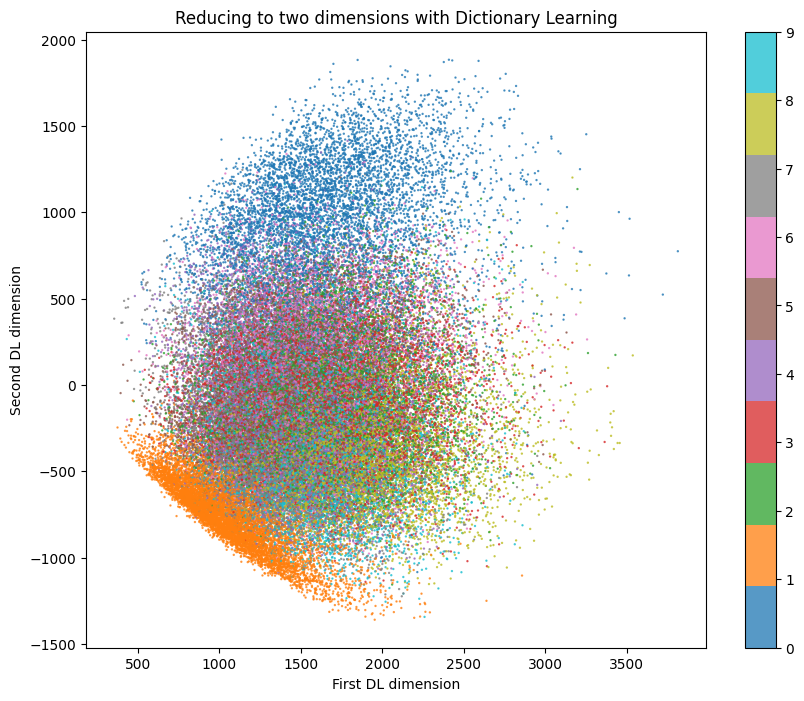

In [53]:
from sklearn.decomposition import MiniBatchDictionaryLearning

X = mnist.data
y = list(map(int, mnist.target))

dr = MiniBatchDictionaryLearning(n_components=2, batch_size=50,
                                 verbose=True)
X_ = dr.fit_transform(X)

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('Reducing to two dimensions with Dictionary Learning')
plt.scatter(X_[:,0], X_[:,1], s=0.5, c=y, alpha=0.75, cmap='tab10')
plt.xlabel('First DL dimension')
plt.ylabel('Second DL dimension')
plt.colorbar()
plt.savefig('ch.3.DL.png', bbox_inches='tight', dpi=350)